# PREDICTING LIFE EXPECTANCY WITH PYTHON


## Important File Imports

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from nose.tools import *
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import make_scorer
from scipy import stats
import seaborn as sns

## Importing CSV Data

In [14]:
# The code was removed by Watson Studio for sharing.

In [15]:
df_data_1 = df_data_1.drop('Year', axis = 1)
df_data_1.head()

,Country,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [16]:
status = pd.get_dummies(df_data_1.Status)
df_data_1 = pd.concat([df_data_1, status], axis = 1)
df_data_1 = df_data_1.drop(['Status'], axis=1)
df_data_1.rename(columns = {'Deloping' : '0', 'Developed' : 1})

,Country,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,1,Developing
0,Afghanistan,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,...,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,0,1
1,Afghanistan,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,...,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,0,1
2,Afghanistan,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,...,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,0,1
3,Afghanistan,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,...,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,0,1
4,Afghanistan,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,...,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,0,1
5,Afghanistan,58.8,279.0,74,0.01,79.679367,66.0,1989,16.7,102,...,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2,0,1
6,Afghanistan,58.6,281.0,77,0.01,56.762217,63.0,2861,16.2,106,...,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9,0,1
7,Afghanistan,58.1,287.0,80,0.03,25.873925,64.0,1599,15.7,110,...,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7,0,1
8,Afghanistan,57.5,295.0,82,0.02,10.910156,63.0,1141,15.2,113,...,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4,0,1
9,Afghanistan,57.3,295.0,84,0.03,17.171518,64.0,1990,14.7,116,...,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1,0,1


In [17]:
df_data_1 = df_data_1.groupby('Country').mean()
df_data_1.head()

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,...,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Developed,Developing
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,58.19375,269.0625,78.2500,0.014375,34.960110,64.562500,2362.2500,15.51875,107.5625,48.3750,...,52.3125,0.10000,340.015425,9.972260e+06,16.58125,15.58125,0.415375,8.21250,0,1
Albania,75.15625,45.0625,0.6875,4.848750,193.259091,98.000000,53.3750,49.06875,0.9375,98.1250,...,98.0625,0.10000,2119.726679,6.969116e+05,1.61875,1.70000,0.709875,12.13750,0,1
Algeria,73.61875,108.1875,20.3125,0.406667,236.185241,78.000000,1943.8750,48.74375,23.5000,91.7500,...,91.8750,0.10000,2847.853392,2.164983e+07,6.09375,5.97500,0.694875,12.71250,0,1
Angola,49.01875,328.5625,83.7500,5.740667,102.100268,70.222222,3561.3125,18.01875,132.6250,46.1250,...,47.6875,2.36875,1975.143045,1.014710e+07,6.19375,6.66875,0.458375,8.04375,0,1
Antigua and Barbuda,75.05625,127.5000,0.0000,7.949333,1001.585226,98.266667,0.0000,38.42500,0.0000,96.9375,...,98.3125,0.12500,9759.305728,NaN,3.42500,3.37500,0.488625,8.84375,0,1


## Explanatory Data Analytics

In [18]:
df_data_1.columns


Index(['Life expectancy ', 'Adult Mortality', 'infant deaths', 'Alcohol',
       'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling',
       'Developed', 'Developing'],
      dtype='object')

Text(0, 0.5, 'Life expectancy')

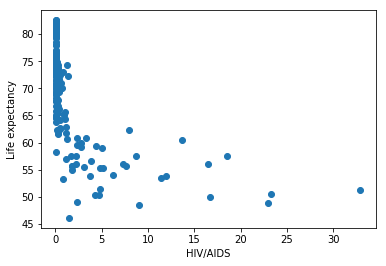

In [21]:
plt.scatter(df_data_1[' HIV/AIDS'], df_data_1['Life expectancy '])
plt.xlabel('HIV/AIDS')
plt.ylabel('Life expectancy')

Text(0, 0.5, 'Life expectancy')

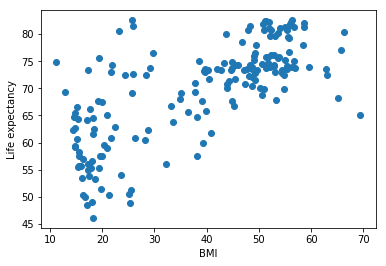

In [23]:
plt.scatter(df_data_1[' BMI '], df_data_1['Life expectancy '])
plt.xlabel('BMI')
plt.ylabel('Life expectancy')

Text(0, 0.5, 'Life expectancy')

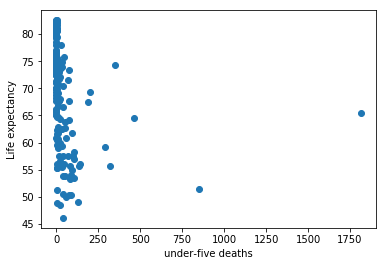

In [24]:
plt.scatter(df_data_1['under-five deaths '], df_data_1['Life expectancy '])
plt.xlabel('under-five deaths')
plt.ylabel('Life expectancy')

Text(0, 0.5, 'Life expectancy')

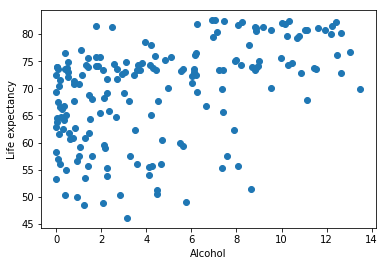

In [25]:
plt.scatter(df_data_1['Alcohol'], df_data_1['Life expectancy '])
plt.xlabel('Alcohol')
plt.ylabel('Life expectancy')

Text(0, 0.5, 'Life expectancy')

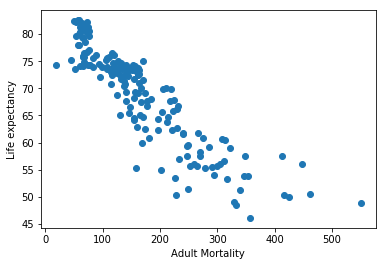

In [26]:
plt.scatter(df_data_1['Adult Mortality'], df_data_1['Life expectancy '])
plt.xlabel('Adult Mortality')
plt.ylabel('Life expectancy')

Text(0, 0.5, 'Life expectancy')

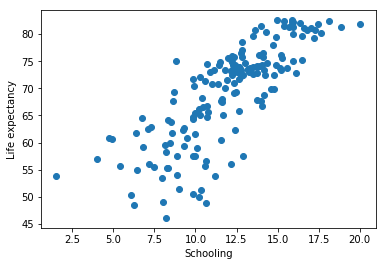

In [27]:
plt.scatter(df_data_1['Schooling'], df_data_1['Life expectancy '])
plt.xlabel('Schooling')
plt.ylabel('Life expectancy')

Text(0, 0.5, 'Life expectancy')

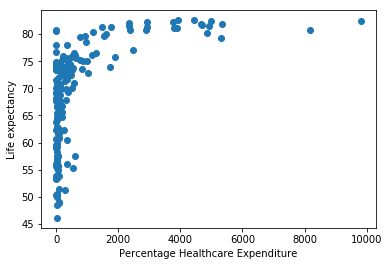

In [29]:
plt.scatter(df_data_1['percentage expenditure'], df_data_1['Life expectancy '])
plt.xlabel('Percentage Healthcare Expenditure')
plt.ylabel('Life expectancy')

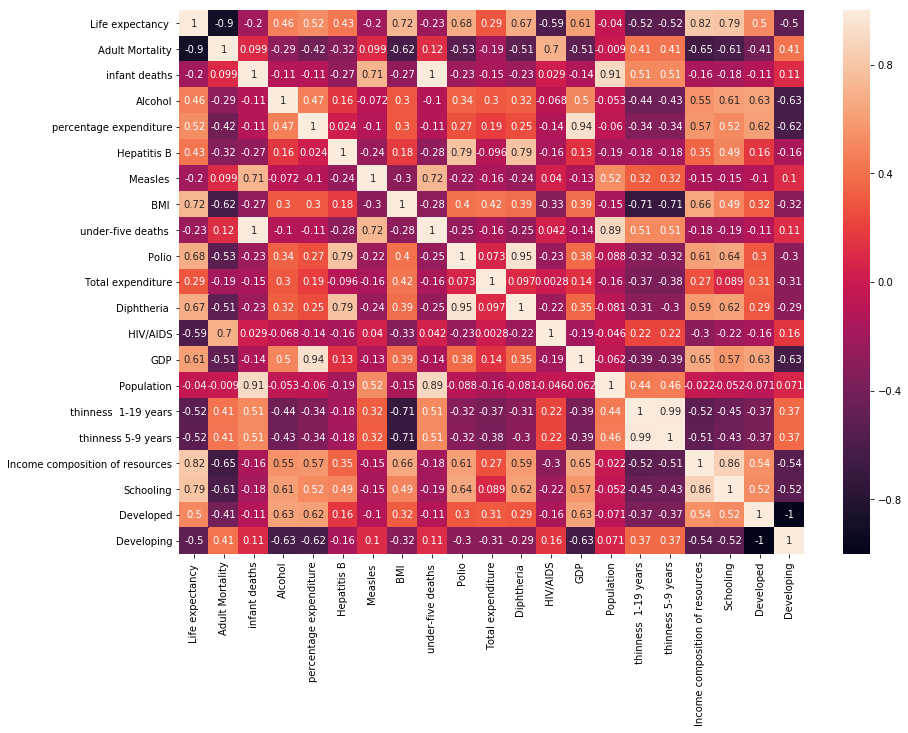

In [30]:
plt.figure(figsize = (14, 10))
sns.heatmap(df_data_1.corr(), annot = True)

## Data Preprocessing

In [34]:
life_labels = df_data_1['Life expectancy ']
life_features = df_data_1.drop('Life expectancy ', axis = 1)
life_features.isnull().head()

,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Developed,Developing
Country,,,,,,,,,,,,,,,,,,,,
Afghanistan,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Albania,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Algeria,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Angola,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Antigua and Barbuda,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False


In [35]:
life_features.isnull().sum()

Adult Mortality                    10
infant deaths                       0
Alcohol                             2
percentage expenditure              0
Hepatitis B                         9
Measles                             0
 BMI                                4
under-five deaths                   0
Polio                               0
Total expenditure                   2
Diphtheria                          0
 HIV/AIDS                           0
GDP                                30
Population                         48
 thinness  1-19 years               4
 thinness 5-9 years                 4
Income composition of resources    17
Schooling                          13
Developed                           0
Developing                          0
dtype: int64

In [36]:
life_labels.isnull().sum()

10

In [40]:
life_features.fillna(value = life_features.mean(), inplace = True)
life_features

,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Developed,Developing
Country,,,,,,,,,,,,,,,,,,,,
Afghanistan,269.062500,78.2500,0.014375,34.960110,64.562500,2362.2500,15.51875,107.5625,48.375000,8.252500,52.312500,0.10000,340.015425,9.972260e+06,16.58125,15.58125,0.415375,8.212500,0,1
Albania,45.062500,0.6875,4.848750,193.259091,98.000000,53.3750,49.06875,0.9375,98.125000,5.945625,98.062500,0.10000,2119.726679,6.969116e+05,1.61875,1.70000,0.709875,12.137500,0,1
Algeria,108.187500,20.3125,0.406667,236.185241,78.000000,1943.8750,48.74375,23.5000,91.750000,4.604000,91.875000,0.10000,2847.853392,2.164983e+07,6.09375,5.97500,0.694875,12.712500,0,1
Angola,328.562500,83.7500,5.740667,102.100268,70.222222,3561.3125,18.01875,132.6250,46.125000,3.919333,47.687500,2.36875,1975.143045,1.014710e+07,6.19375,6.66875,0.458375,8.043750,0,1
Antigua and Barbuda,127.500000,0.0000,7.949333,1001.585226,98.266667,0.0000,38.42500,0.0000,96.937500,4.791333,98.312500,0.12500,9759.305728,1.257006e+07,3.42500,3.37500,0.488625,8.843750,0,1
Argentina,106.000000,10.1250,7.966667,773.038981,81.285714,2.0000,54.98125,11.3750,93.375000,6.912667,92.375000,0.10000,6998.575103,2.012120e+07,1.07500,0.95000,0.794125,16.506250,0,1
Armenia,117.375000,1.0000,3.702667,131.007419,87.562500,274.2500,44.70625,1.0000,89.125000,4.861333,87.375000,0.10000,1999.986318,1.015165e+06,2.03750,2.11250,0.698375,11.787500,0,1
Australia,63.187500,1.0000,10.155333,5332.226473,93.400000,103.9375,55.86250,1.3750,86.750000,8.836667,86.875000,0.10000,34637.565047,4.587010e+06,0.66875,0.62500,0.918125,20.037500,1,0
Austria,65.750000,0.0000,12.236000,4928.439188,81.062500,77.2500,48.28750,0.0000,86.000000,4.715333,86.750000,0.10000,33827.476309,6.474880e+06,1.73125,1.93750,0.862375,15.387500,1,0


In [41]:
life_labels.fillna(value = life_labels.mean(), inplace = True)
life_labels

Country
Afghanistan                                             58.193750
Albania                                                 75.156250
Algeria                                                 73.618750
Angola                                                  49.018750
Antigua and Barbuda                                     75.056250
Argentina                                               75.156250
Armenia                                                 73.400000
Australia                                               81.812500
Austria                                                 81.481250
Azerbaijan                                              70.731250
Bahamas                                                 74.287500
Bahrain                                                 75.725000
Bangladesh                                              69.300000
Barbados                                                74.356250
Belarus                                                 69.906250
Be

In [39]:
stats.describe(life_features[1:])

DescribeResult(nobs=192, minmax=(array([1.87500000e+01, 0.00000000e+00, 1.00000000e-02, 0.00000000e+00,
       8.00000000e+00, 0.00000000e+00, 5.20000000e+00, 0.00000000e+00,
       9.00000000e+00, 1.64666667e+00, 9.00000000e+00, 1.00000000e-01,
       1.36183210e+02, 2.92000000e+02, 1.00000000e-01, 1.00000000e-01,
       1.31687500e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00]), array([5.50062500e+02, 1.36668750e+03, 1.34973333e+01, 9.80181038e+03,
       9.90000000e+01, 6.58579375e+04, 8.73000000e+01, 1.81250000e+03,
       9.90000000e+01, 1.72400000e+01, 9.90000000e+01, 3.29437500e+01,
       5.73628746e+04, 4.21467691e+08, 2.71000000e+01, 2.79437500e+01,
       9.31437500e-01, 2.00375000e+01, 1.00000000e+00, 1.00000000e+00])), mean=array([1.64253396e+02, 2.85745443e+01, 4.46296480e+00, 7.12321318e+02,
       7.85909681e+01, 2.30174674e+03, 3.96797168e+01, 3.96419271e+01,
       8.26078218e+01, 6.01668050e+00, 8.23842541e+01, 1.67047526e+00,
       7.25930328e+03, 1.25835883e

In [43]:
min_max_scaler = MinMaxScaler()

In [45]:
life_features = min_max_scaler.fit_transform(life_features)
life_features

array([[4.71121045e-01, 5.72552248e-02, 3.24378429e-04, ...,
        4.09856519e-01, 0.00000000e+00, 1.00000000e+00],
       [4.95235855e-02, 5.03041112e-04, 3.58762543e-01, ...,
        6.05739239e-01, 0.00000000e+00, 1.00000000e+00],
       [1.68333137e-01, 1.48625783e-02, 2.94103109e-02, ...,
        6.34435434e-01, 0.00000000e+00, 1.00000000e+00],
       ...,
       [3.63369015e-01, 2.88105364e-02, 2.76802926e-03, ...,
        4.24516532e-01, 0.00000000e+00, 1.00000000e+00],
       [6.31572756e-01, 2.44660905e-02, 1.65290890e-01, ...,
        5.59575795e-01, 0.00000000e+00, 1.00000000e+00],
       [8.34960593e-01, 1.94356793e-02, 3.31570362e-01, ...,
        4.90330630e-01, 0.00000000e+00, 1.00000000e+00]])

In [47]:
life_features_train, life_features_test, life_labels_train, life_labels_test = train_test_split(life_features, life_labels, train_size = 0.7, test_size = 0.3)


## Linear Regression and additions

In [48]:
linear_model = LinearRegression()
linear_model.fit(life_features_train, life_labels_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [49]:
print('R_square score on the training: %.2f' % linear_model.score(life_features_train, life_labels_train))


R_square score on the training: 0.93


In [51]:
linear_model_predict = linear_model.predict(life_features_test)

In [52]:
print('Coefficients: \n', linear_model.coef_)
print("Mean squared error: %.2f"
      % mean_squared_error(life_labels_test, linear_model_predict))
print("Mean absolute error: %.2f"
      % mean_absolute_error(life_labels_test, linear_model_predict))
print('R_square score: %.2f' % r2_score(life_labels_test, linear_model_predict))

Coefficients: 
 [-27.03131796  55.24461626   1.82867962   5.36943589  -4.2615503
  -0.11186553   3.26954106 -64.27069907  -1.63478645   2.89786156
  11.01809035  -6.20665508  -1.66485745   4.01991375  -1.51647801
   3.7419675    7.56256894   3.0753986   -0.32662947   0.32662947]
Mean squared error: 7.05
Mean absolute error: 2.12
R_square score: 0.90
